# <font color='brown'><center> Bike Sharing - Using Multiple Linear Regression

<div>
<img src="https://storage.googleapis.com/gweb-uniblog-publish-prod/original_images/image1_hH9B4gs.jpg" width='1000'>
</div>

## <font color='blue'>Table of Contents
    
- [1. Problem Statement](#1.-Problem-Statement)
    - [1.1 Business Goal](#1.1-Business-Goal)
    
    
- [2. Reading and Understanding the data](#2.-Reading-and-Understanding-the-data)
    - [2.1 Importing the necessary libraries](#2.1-Importing-the-necessary-libraries)
    - [2.2 Reading the data](#2.2-Reading-the-data)
    - [2.3 Understanding the data](#2.3-Understanding-the-data)
        - [2.3.1 Inspecting the various aspects of the bike_sharing dataset](#2.3.1-Inspecting-the-various-aspects-of-the-bike_sharing-dataset)
        - [2.3.2 Data Cleaning](#2.3.2-Data-Cleaning)
    
    
    
- [3. Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)
    - [3.1 Univariate Analysis](#3.1-Univariate-Analysis)
        - [3.1.1 Checking all the columns](#3.1.1-Checking-all-the-columns)
        - [3.1.2 Converting the categorical variables from the numerical category into categories](#3.1.2-Converting-the-categorical-variables-from-the-numerical-category-into-categories)
        - [3.1.3 Univariate Analysis on Numerical columns](#3.1.3-Univariate-Analysis-on-Numerical-columns)
        - [3.1.4 Univariate Analysis on Categorical columns](#3.1.4-Univariate-Analysis-on-Categorical-columns)
    - [3.2 Bivariate Analysis](#3.2-Bivariate-Analysis)
        - [3.2.1 Bivariate Analysis on numerical columns](#3.2.1-Bivariate-Analysis-on-numerical-columns)
        - [3.2.2 Bivariate Analysis on Categorical columns](#3.2.2-Bivariate-Analysis-on-Categorical-columns)
    - [3.3 Multivariate Analysis](#3.3-Multivariate-Analysis)
        - [3.3.1 Pairplot for all the columns](#3.3.1-Pairplot-for-all-the-columns)
        - [3.3.2 Heatmap for all the columns](#3.3.2-Heatmap-for-all-the-columns)

    
    
- [4. Data Preparation for Linear Regression](#4.-Data-Preparation-for-Linear-Regression)
    - [4.1 Creating dummy variables for all categorical variables](#4.1-Creating-dummy-variables-for-all-categorical-variables)
    - [4.2 Creating train test split](#4.2-Creating-train-test-split)
    - [4.3 Feature scaling for continuous variables](#4.3-Feature-scaling-for-continuous-variables)
    
    
- [5. Feature Selection and Model Building](#5.-Feature-Selection-and-Model-Building)
    - [5.1 Automated Feature Selection - using RFE](#5.1-Automated-Feature-Selection---using-RFE)
    - [5.2 Manual Feature Elimination - using p-value & VIF](#5.2-Manual-Feature-Elimination---using-p-value-&-VIF)
        - [5.2.1 Creating a Function for Model building](#5.2.1-Creating-a-Function-for-Model-building)
        - [5.2.2 Creating a Function for VIF](#5.2.2-Creating-a-Function-for-VIF)
    - [5.3 Model Building](#5.3-Model-Building)

    
- [6. Residual Analysis](#6.-Residual-Analysis)
    - [6.1 Error Distribution](#6.1-Error-Distribution)
    - [6.2 Pattern checking for Actual Vs Predicted](#6.2-Pattern-checking-for-Actual-Vs-Predicted)
    - [6.3 Checking the error term pattern](#6.3-Checking-the-error-term-pattern)
    - [6.4 Checking the $R^2$ value using sklearn](#6.4-Checking-the-$R^2$-value-using-sklearn)
    - [6.5 Checking the relationship between y_train and residuals](#6.5-Checking-the-relationship-between-y_train-and-residuals)
    
    
- [7. Predictions and evaluation on the test data](#7.-Predictions-and-evaluation-on-the-test-data)
    - [7.1 Predictions on the test dataset](#7.1-Predictions-on-the-test-dataset)
    - [7.2 $R^2$ value for test predictions](#7.2-$R^2$-value-for-test-predictions)
    - [7.3 Model Evaluation](#7.3-Model-Evaluation)
        - [7.3.1 Checking the relationship between Actual Vs Predicted](#7.3.1-Checking-the-relationship-between-Actual-Vs-Predicted)
        - [7.3.2 Checking the pattern between actual and predicted](#7.3.2-Checking-the-pattern-between-actual-and-predicted)
        - [7.3.3 Checking distribution of Error term](#7.3.3-Checking-distribution-of-Error-term)
    
    
- [8. Final Model Interpretation](#8.-Final-Model-Interpretation)
    
    
- [9. Recommendations for the company](#9.-Recommendations-for-the-company)

---

## <font color='blue'>1. Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### <font color='blue'>1.1 Business Goal
    
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

---

## <font color='blue'>2. Reading and Understanding the data

### <font color='blue'>2.1 Importing the necessary libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the numpy and pandas 
import numpy as np
import pandas as pd 

# Importing matplotlib and seaborn 
import matplotlib.pyplot as plt 
import seaborn as sns

# Setting the columns and row for visibility
pd.set_option('display.max_columns', 500)
pd.set_option("display.max_rows",500)

#Importing stats models
import statsmodels.api as sm

# Importing sklearn
import sklearn
# For train test split
from sklearn.model_selection import train_test_split
# For mean squared error
from sklearn.metrics import mean_squared_error
# for Rsquare
from sklearn.metrics import r2_score
# for Linear regression class
from sklearn.linear_model import LinearRegression
# for minmaxscalar
from sklearn.preprocessing import MinMaxScaler
# for RFE
from sklearn.feature_selection import RFE
# For calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

### <font color='blue'>2.2 Reading the data

In [2]:
# Reading the data

bike_sharing = pd.read_csv(r"C:\Users\sethu\Downloads\Linear Regression Projects\Bike Sharing - Linear Regression Assignment\day.csv")
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### <font color='blue'>2.3 Understanding the data

#### <font color='blue'>2.3.1 Inspecting the various aspects of the `bike_sharing` dataset

In [3]:
# Checking the shape of the dataframe

bike_sharing.shape

(730, 16)

The `bike_sharing` dataset has 730 rows and 16 columns

In [4]:
# Checking the info() of bike sharing data frame

bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Checking the null values in the dataframe

bike_sharing.isnull().sum().sort_values(ascending=False)

cnt           0
registered    0
casual        0
windspeed     0
hum           0
atemp         0
temp          0
weathersit    0
workingday    0
weekday       0
holiday       0
mnth          0
yr            0
season        0
dteday        0
instant       0
dtype: int64

As per the dataset, there are no null values, so missing value treatment is not needed

In [6]:
# checking the summary of numarical columns in the bike_sharing dataframe

bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Checking the column names of bike_sharing dataframe

bike_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### <font color='blue'>2.3.2 Data Cleaning
    
**Dropping the unnecessary columns**:
- **`instant`** can be removed because it is just a row instance identifier.
- **`dteday`** can be removed as we have some of the date features like mnth and year and weekday already in other columns and also for this analysis we will not consider the day to day trend in demand for bikes.
- **`casual`** and **`registered`** variables describe the target variable **`cnt`** in a very trivial way **`cnt = casual + registered`**, which leads to data leakage.

In [8]:
# Dropping the 'instant' column as it is index which has nothing to do with 'cnt' column
bike_sharing.drop('instant',axis=1,inplace=True)

# Dropping dteday as we have already have month and weekday columns to work with
bike_sharing.drop('dteday',axis=1,inplace=True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column
bike_sharing.drop('casual',axis=1,inplace=True)
bike_sharing.drop('registered',axis=1,inplace=True) 


bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


---

## <font color='blue'>3. Exploratory Data Analysis

### <font color='blue'>3.1 Univariate Analysis

#### <font color='blue'>3.1.1 Checking all the columns

In [9]:
# Checking the value counts of the 'season' column

bike_sharing.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [10]:
# Checking the value counts of the 'yr' column

bike_sharing.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

In [11]:
# Checking the value counts of the 'mnth' column

bike_sharing.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [12]:
# Checking the value counts of the 'holiday' column

bike_sharing.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [13]:
# Checking the value counts of the 'weekday' column

bike_sharing.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [14]:
# Checking the value counts of the 'workingday' column

bike_sharing.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [15]:
# Checking the value counts of the 'weathersit' column

bike_sharing.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [16]:
# Checking the value counts of the 'temp' column

bike_sharing.temp.value_counts()

10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
19.850847    4
26.615847    4
29.144153    4
17.937500    4
21.832500    3
29.861653    3
16.126653    3
14.486653    3
19.372500    3
22.550000    3
21.730000    3
14.042500    3
28.392500    3
14.076653    3
11.240847    3
13.085847    3
16.810000    3
18.825847    3
30.066653    3
27.367500    3
13.325000    3
15.750847    3
26.650000    3
31.775000    3
29.793347    3
21.080847    3
25.898347    3
23.028347    3
18.996653    3
11.582500    3
17.869153    3
21.388347    3
26.103347    3
16.980847    3
28.836653    3
29.349153    3
12.129153    3
24.873347    3
29.998347    3
24.565847    3
23.677500    3
22.720847    3
29.383347    3
26.786653    3
29.554153    3
30.613347    3
24.702500    3
27.606653    3
18.313347    3
9.122500     2
29.075847    2
10.728347    2
23.062500    2
12.846653    2
13.290847    2
15.306653    2
29.690847    2
25.420000    2
26.957500    2
29.656653    2
32.526653    2
19.030847 

In [17]:
# Checking the value counts of the 'atemp' column

bike_sharing.atemp.value_counts()

32.73440    4
18.78105    3
31.85040    3
16.28750    2
17.58145    2
           ..
36.96315    1
24.93625    1
32.73460    1
14.82130    1
9.31250     1
Name: atemp, Length: 689, dtype: int64

In [18]:
# Checking the value counts of the 'hum' column

bike_sharing.hum.value_counts()

61.3333    4
69.7083    3
59.0000    3
57.0000    3
72.9583    3
          ..
64.7917    1
44.9583    1
71.2083    1
50.0417    1
49.8750    1
Name: hum, Length: 594, dtype: int64

In [19]:
# Checking the value counts of the 'windspeed' column

bike_sharing.windspeed.value_counts()

7.416900     3
15.333486    3
7.959064     3
11.166689    3
7.125450     3
            ..
14.500475    1
8.250514     1
19.416332    1
16.522200    1
9.750175     1
Name: windspeed, Length: 649, dtype: int64

In [20]:
# Checking the value counts of the 'cnt' column

bike_sharing.cnt.value_counts()

5119    2
4274    2
3784    2
6883    2
2077    2
       ..
6273    1
5501    1
4760    1
1683    1
4097    1
Name: cnt, Length: 695, dtype: int64

**<font color='blue'>Inference:**

- `'temp', 'atemp', 'hum', 'windspeed', 'cnt'` are the numerical column
- `'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'` are the categorical column
- `'yr','holiday' and 'workingday'` are Binary Catagorical variable

#### <Font color='blue'>3.1.2 Converting the categorical variables from the numerical category into categories

As per the Data dictionary, we can convert `season,weathersit,mnth & weekday` columns into categories

In [21]:
# convertng season,weathersit,mnth & weekday columns in to catagories

bike_sharing.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace=True)
bike_sharing.mnth.replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:"May",
                           6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"},inplace=True)
bike_sharing.weathersit.replace({1:'Clear',2:"Cloudy",3:"Light Rain + Thunderstorm",4:"Heavy Rain + Thunderstorm"},inplace=True)
bike_sharing.weekday.replace({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"},inplace=True)

bike_sharing.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,Sat,0,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,Sun,0,Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,Jan,0,Mon,1,Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,Jan,0,Tue,1,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,Jan,0,Wed,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


**`yr, holiday, workingday`** are Binary categorical variables, we can keep as it is for model building

#### <font color='blue'>3.1.3 Univariate Analysis on Numerical columns

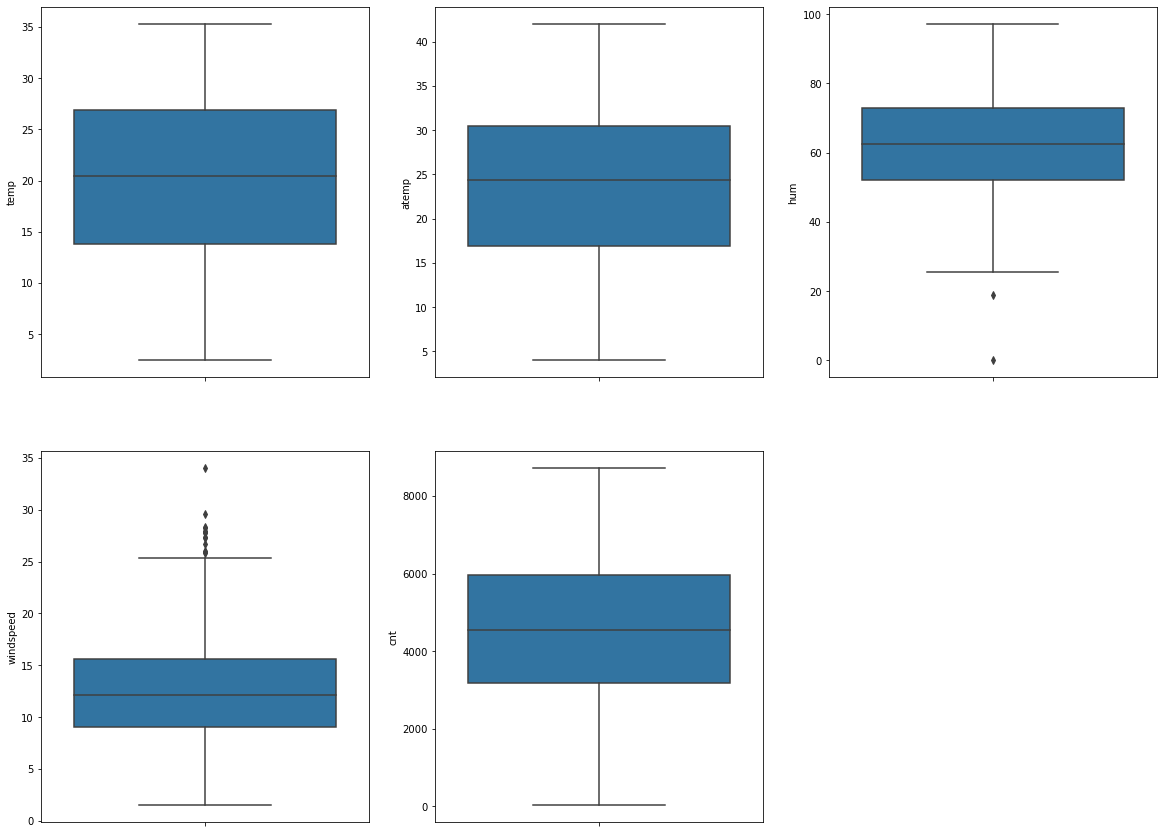

In [22]:
# Perforing univariate analysis for numerical columns using boxplot

col = ['temp', 'atemp', 'hum', 'windspeed','cnt']
plt.figure(figsize=[20,15])
for i in enumerate(col):
    plt.subplot(2,3,i[0]+1)
    sns.boxplot(data=bike_sharing,y=i[1])
    
plt.show()

**<font color='blue'>Inference:**
- There are no outliers overall except `windspeed and hum`
- We can keep the outliers as it's for further analysis

#### <font color='blue'>3.1.4 Univariate Analysis on Categorical columns

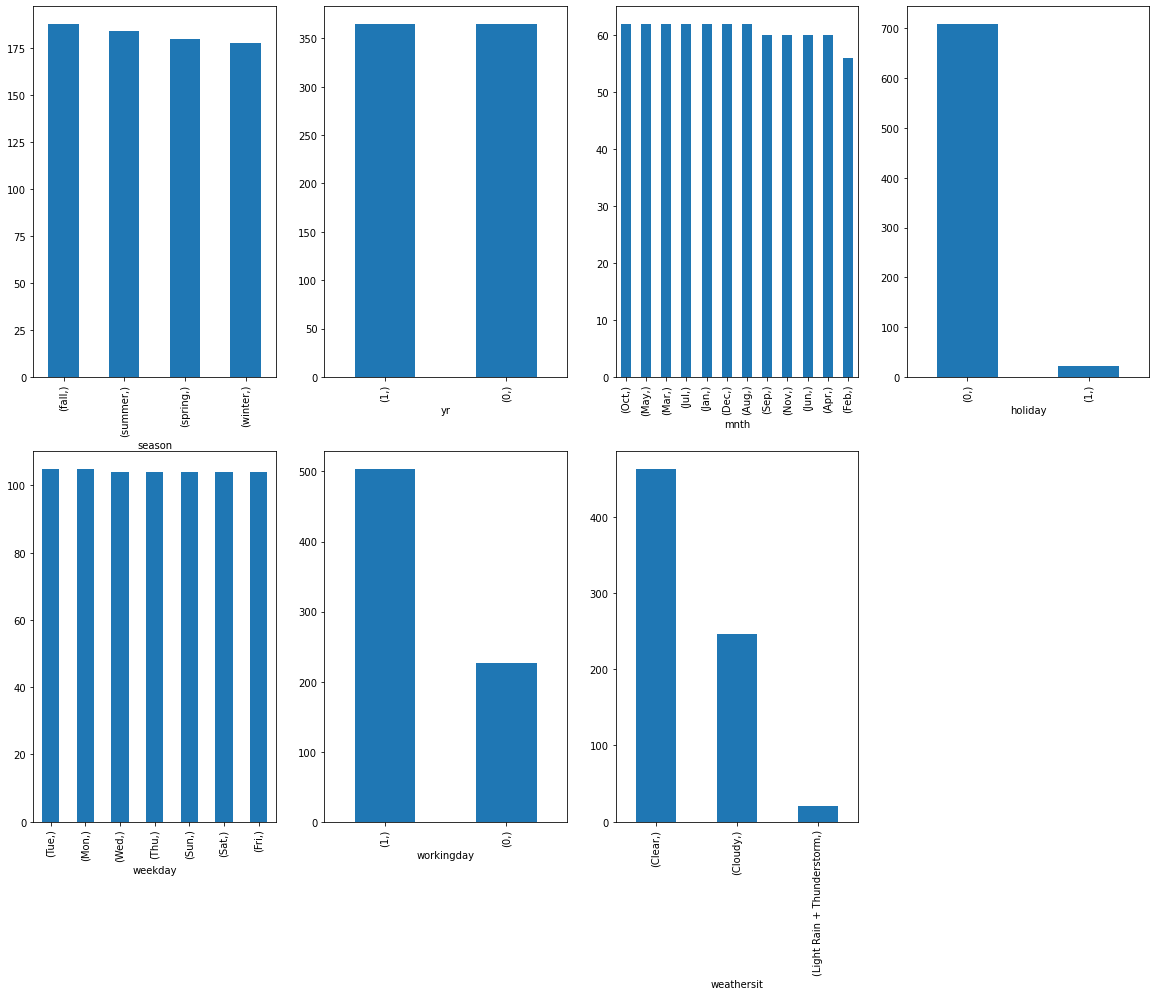

In [23]:
col = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
plt.figure(figsize=[20,15])
for i in enumerate(col):
    plt.subplot(2,4,i[0]+1)
    bike_sharing[[i[1]]].value_counts().plot.bar()
    plt.xlabel(i[1])
    
plt.show()

**<font color='blue'>Inference:**
- There is no significant difference in `season`,'yr`,`weekday` 
- There is less demand in `holiday`,`non-workingday`,`Rainy` days
- Less demand in `Feb` month compared to other months

### <font color='blue'>3.2 Bivariate Analysis

#### <font color='blue'>3.2.1 Bivariate Analysis on numerical columns

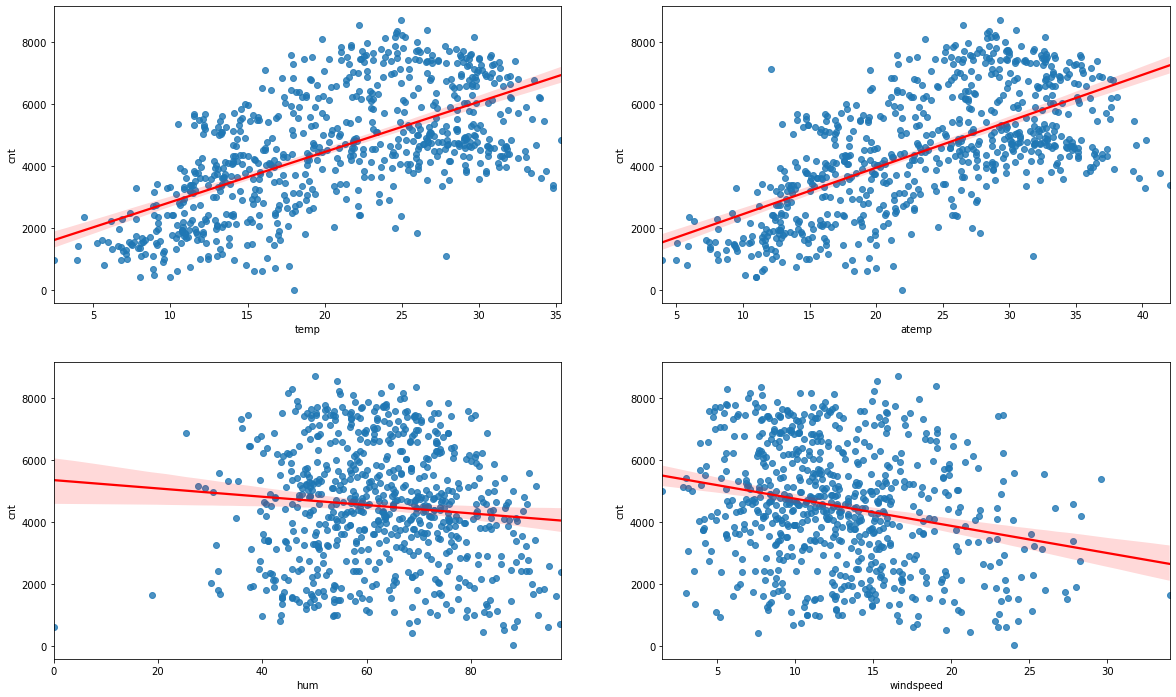

In [24]:
# Ploting the scatterplot for numerical variable with target variable 'cnt'

col = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=[20,12])
for i in enumerate(col):
    plt.subplot(2,2,i[0]+1)
    sns.regplot(data=bike_sharing,x=i[1],y='cnt',line_kws={"color":'red'})
    
plt.show()

**<font color='blue'>Inference:**
- There is a positive correlation between `temp & atemp` and `cnt`
- There is a negative correlation between `windspeed & hum` and `cnt`

#### <font color='blue'>3.2.2 Bivariate Analysis on Categorical columns

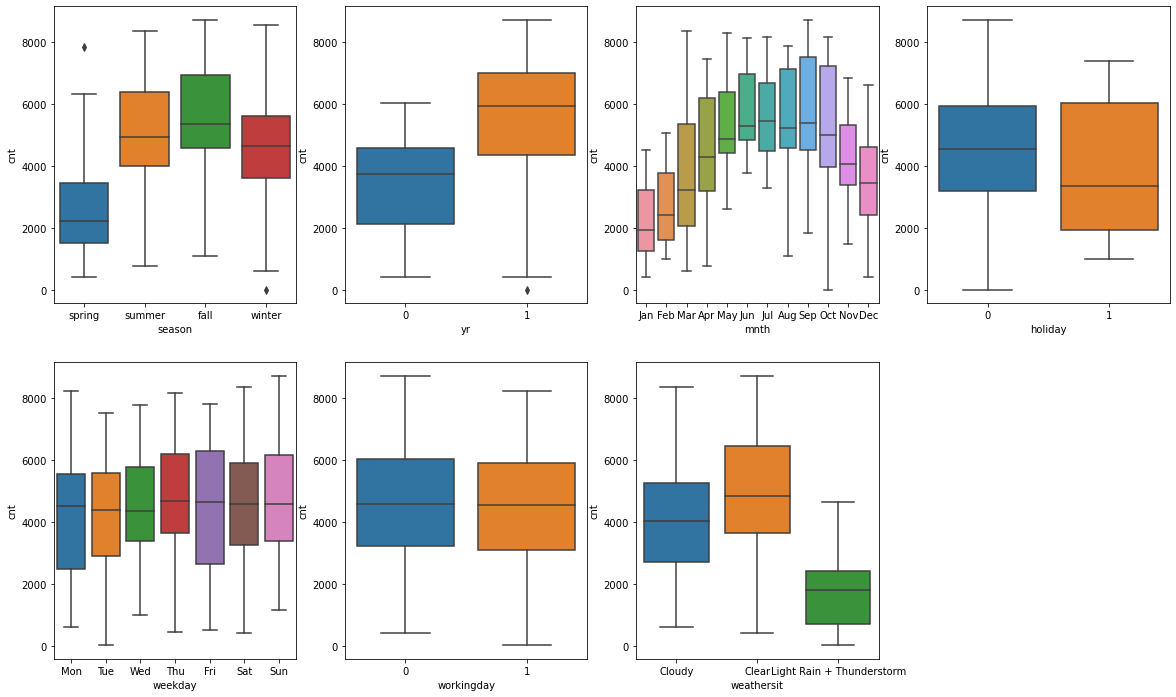

In [25]:
# Ploting the boxplot for categorical variable with target variable 'cnt'

col = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
plt.figure(figsize=[20,12])
for i in enumerate(col):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(data=bike_sharing,x=i[1],y='cnt')
    
plt.show()

**<font color='blue'>Inference:**
- Season **`Fall`** has the highest demand for rental bikes, whereas the **`Spring`** has the lowest demand
- The demand for the rental bike has increased in **`2019`** as compared to **`2018`**
- There is high demand in **`Sep`** where as in **`Dec`** has the lowest demand, because in **`Dec`** usually it will be heavy snow
- There is a low demand for **`holidays`** compared to **`non-holidays`**
- There is not much of a difference in demand between **`weekdays`**
- There is not much of a difference in demand between **`working`** and **`non-working days`**
- There is high demand in **`Clear weather`**, whereas low demand during **`Light Rain + Thunderstorm days`**, there are no users renting the bike during **`Heavy snow`**
- There is high demand in **`September`** month
- There are no noticeable outliers in the data

### <font color='blue'>3.3 Multivariate Analysis

#### <font color='blue'>3.3.1 Pairplot for all the columns

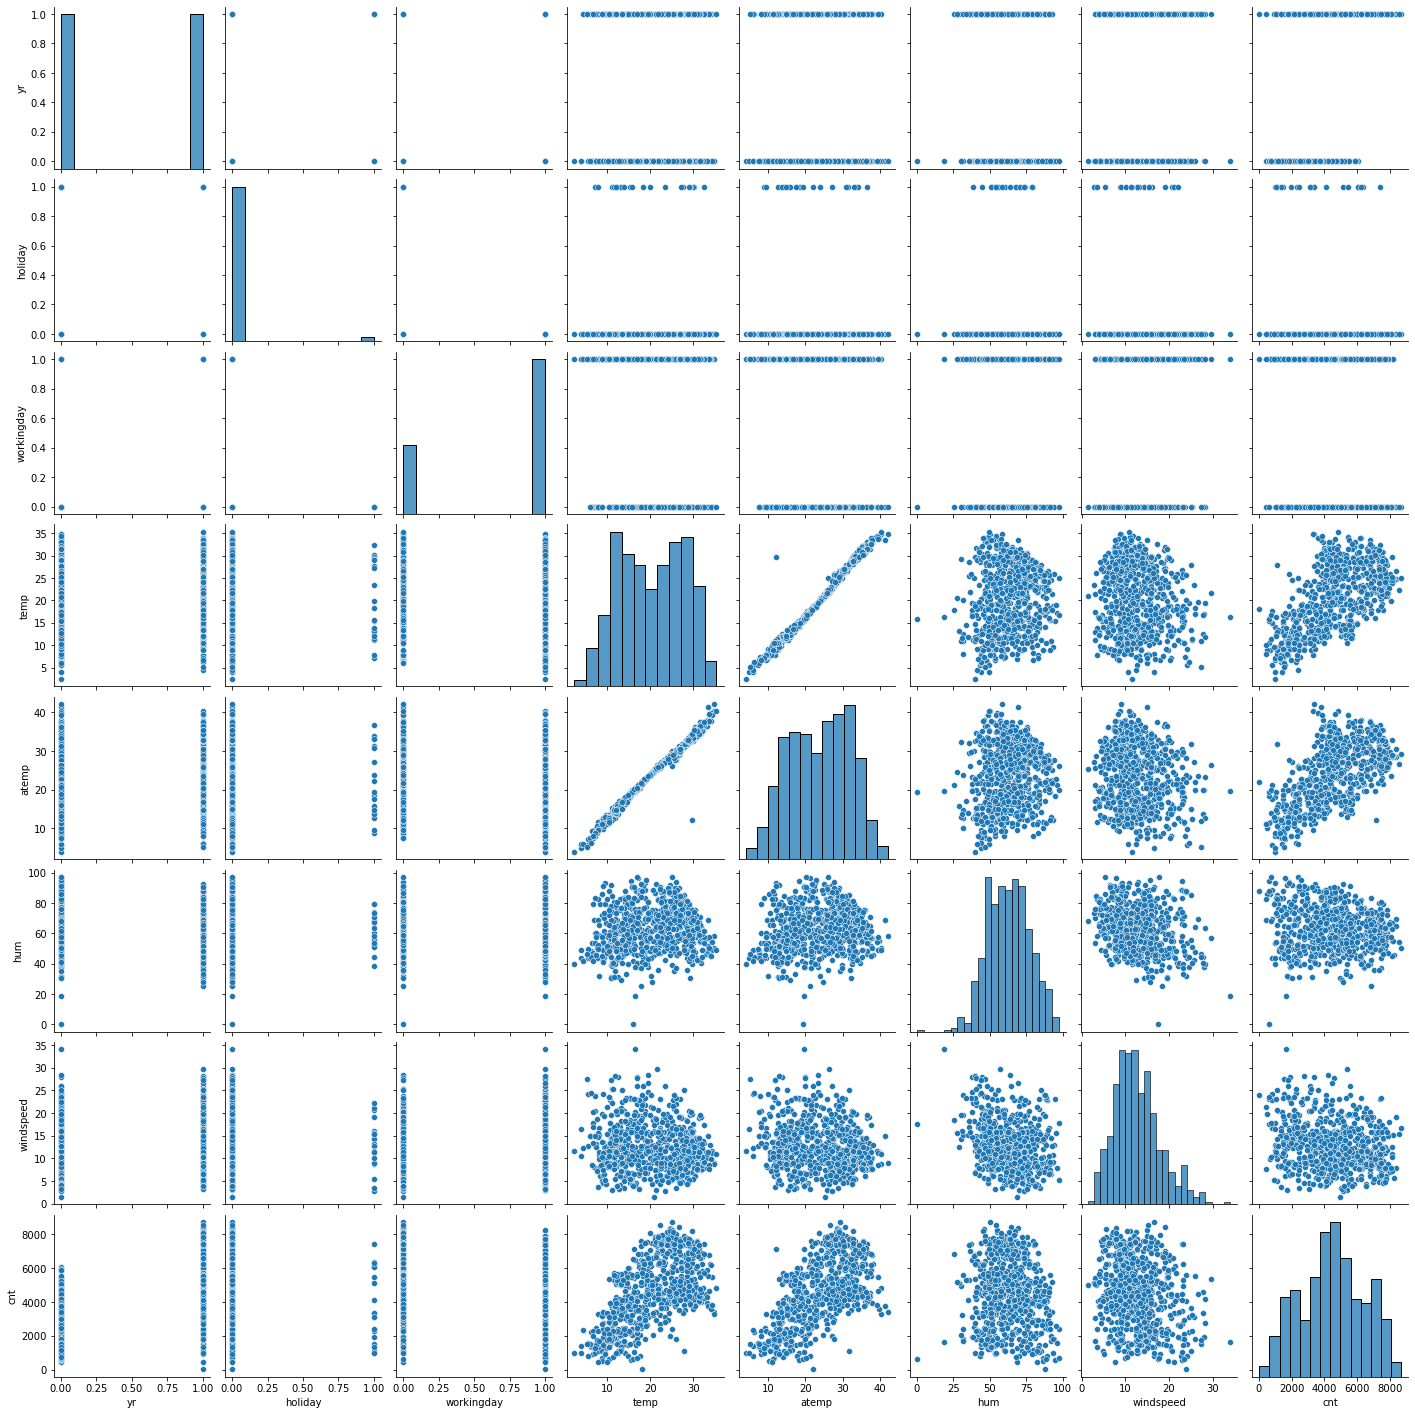

In [26]:
# Ploting the pair plot

sns.pairplot(bike_sharing);

#### <font color='blue'>3.3.2 Heatmap for all the columns

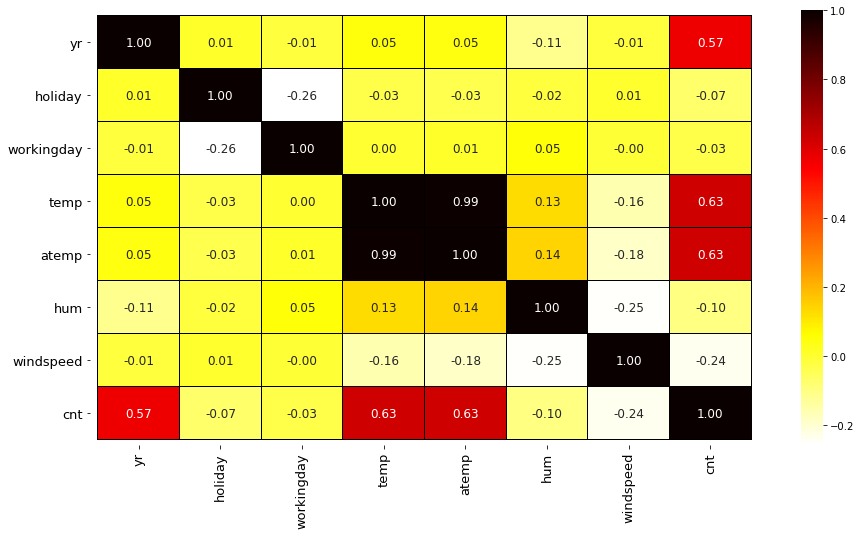

In [27]:
# checking the heat map

plt.figure(figsize=[15,8])
fig = sns.heatmap(bike_sharing.corr(),cmap='hot_r',
            annot=True,linecolor='black',linewidths=0.01,annot_kws={"fontsize":12},fmt="0.2f")

top, bottom = fig.get_ylim()
fig.set_ylim(top+0.1,bottom-0.1)

left, right = fig.get_xlim()
fig.set_xlim(left-0.1,right+0.1) 

plt.yticks(fontsize=13,rotation=0)
plt.xticks(fontsize=13,rotation=90);

**<font color='blue'>Inference:**
- Looks like `temp` and `atemp` are highly correlating with each other and also their correlation with `cnt` is the same
- There is a positive correlation between `temp,atemp,yr and `cnt`
- There is a negative correlation between `windspeed, hum,workingday & holiday` and `cnt`
- For `season,weathersit,mnth and weekday` dummy variable to be created for further analysis and model building 

---
## <font color='blue'>4. Data Preparation for Linear Regression

### <font color='blue'>4.1 Creating dummy variables for all categorical variables

Here except `yr,holiday & workingday` (already in binary form) we can create the dummy variables

In [28]:
# Creating dummy columns for 'season','mnth','weekday','weathersit' variables

bike_sharing = pd.get_dummies(data=bike_sharing,columns=['season','mnth','weekday','weathersit'],drop_first=True)

In [29]:
# Checking wether dummy columns has been created or not

bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain + Thunderstorm
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
# Checking the info()

bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   yr                                    730 non-null    int64  
 1   holiday                               730 non-null    int64  
 2   workingday                            730 non-null    int64  
 3   temp                                  730 non-null    float64
 4   atemp                                 730 non-null    float64
 5   hum                                   730 non-null    float64
 6   windspeed                             730 non-null    float64
 7   cnt                                   730 non-null    int64  
 8   season_spring                         730 non-null    uint8  
 9   season_summer                         730 non-null    uint8  
 10  season_winter                         730 non-null    uint8  
 11  mnth_Aug           

### <font color='blue'>4.2 Creating train test split

In [31]:
# Checking the shape of the dataframe before splitting

bike_sharing.shape

(730, 30)

In [32]:
# y to contain only the target variable 'cnt'
y = bike_sharing.pop('cnt')

# X to contain all the features except target variable
X = bike_sharing

# Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=100)

In [33]:
# Checking the independent variable
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain + Thunderstorm
0,0,0,1,14.110847,18.18125,80.5833,10.749882,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
# Checking the shape of all splitted dataframe

print("X_train shape - ",X_train.shape)
print("X_test shape - ",X_test.shape)
print("y_train shape - ",y_train.shape)
print("y_test shape - ",y_test.shape)

X_train shape -  (511, 29)
X_test shape -  (219, 29)
y_train shape -  (511,)
y_test shape -  (219,)


### <font color='blue'>4.3 Feature scaling for continuous variables

- To make all features in the same scale interpret easily (for coefficients)
- The columns are continuous to be scaled are `temp,atemp,hum & windspeed`
- Here we will use MinMaxScalar for scaling

In [35]:
# List of features to be scaled
num_vars = ['temp','atemp','hum','windspeed']

# using MinMaxScalar to scale the variables
scalar = MinMaxScaler()

# Fitting and Transforming the training dataframe
X_train[num_vars] = scalar.fit_transform(X_train[num_vars])

In [36]:
# Inspecting the training dataset for scaling

X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain + Thunderstorm
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [37]:
# Checking the describe function for scalar

X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain + Thunderstorm
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.712329,0.537386,0.513133,0.650333,0.320844,0.242661,0.246575,0.248532,0.095890,0.084149,0.066536,0.088063,0.076321,0.076321,0.097847,0.084149,0.086106,0.086106,0.080235,0.154599,0.129159,0.136986,0.142857,0.152642,0.136986,0.344423,0.029354
std,0.500412,0.157613,0.453121,0.225640,0.212202,0.145741,0.169639,0.429112,0.431440,0.432585,0.294729,0.277883,0.249461,0.283664,0.265771,0.265771,0.297399,0.277883,0.280795,0.280795,0.271923,0.361876,0.335704,0.344170,0.350270,0.359994,0.344170,0.475645,0.168963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we can see the `min` and `max` values for all the columns are in between 0 and 1, so the required variable has been scaled properly, we can start building the model for the training dataset

---
## <font color='blue'>5. Feature Selection and Model Building

### <font color='blue'>5.1 Automated Feature Selection - using RFE

In [38]:
# Build a Linear Regression model using sklearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
# Running RFE with the output number of the variable (columns) equal to 15
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [40]:
# Features that selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 9),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 5),
 ('weekday_Sun', False, 6),
 ('weekday_Thu', False, 14),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 11),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Light Rain + Thunderstorm', True, 1)]

In [41]:
#list of RFE selected columns

X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Cloudy',
       'weathersit_Light Rain + Thunderstorm'],
      dtype='object')

In [42]:
#list of RFE not selected columns

list(X_train.columns[~rfe.support_])

['workingday',
 'atemp',
 'mnth_Aug',
 'mnth_Feb',
 'mnth_Jun',
 'mnth_Mar',
 'mnth_May',
 'mnth_Oct',
 'weekday_Mon',
 'weekday_Sat',
 'weekday_Sun',
 'weekday_Thu',
 'weekday_Tue',
 'weekday_Wed']

we can start build the model using `RFE` selected 15 features

### <font color='blue'>5.2 Manual Feature Elimination - using p-value & VIF

#### <font color='blue'>5.2.1 Creating a Function for Model building

In [43]:
# Creating Function for model building using statsmodel api - Takes the columns to be selected for model as a feature
def model_bulding(cols):
    # adding constant to the X_train dataframe
    X_train_sm = sm.add_constant(X_train[cols])
    # fitting the model using OLS method
    lm = sm.OLS(y_train,X_train_sm).fit()
    print(lm.summary())
    return lm

#### <font color='blue'>5.2.2 Creating a Function for VIF

In [44]:
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [45]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[list(X_train.columns[rfe.support_])]
X_train_rfe.shape

(511, 15)

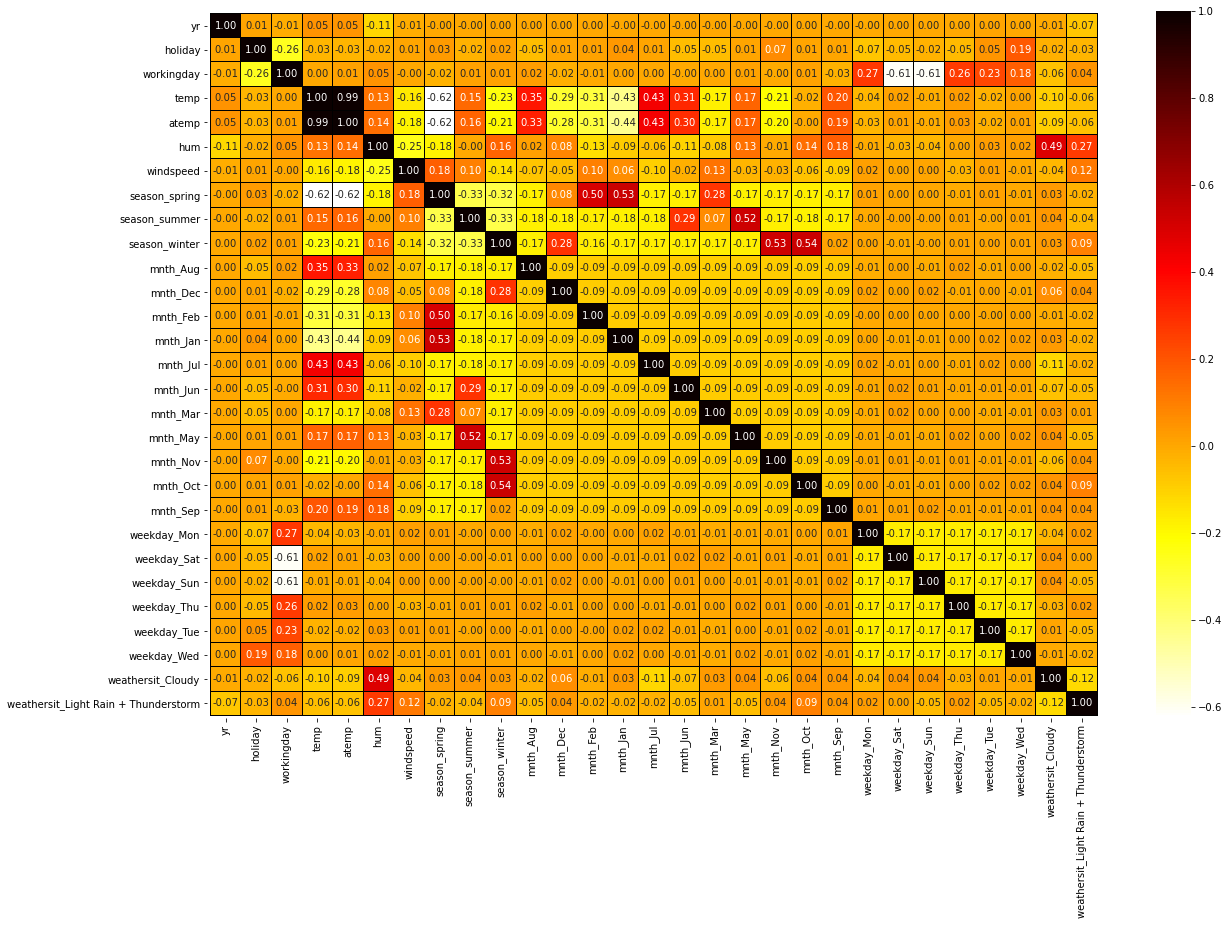

In [46]:
# Plotting heat map for overall fetaures

plt.figure(figsize=[20,13])
fig = sns.heatmap(bike_sharing.corr(),cmap='hot_r',
            annot=True,linecolor='black',linewidths=0.01,annot_kws={"fontsize":10},fmt="0.2f")

top, bottom = fig.get_ylim()
fig.set_ylim(top+0.1,bottom-0.1)

left, right = fig.get_xlim()
fig.set_xlim(left-0.1,right+0.1) 

plt.yticks(fontsize=10,rotation=0)
plt.xticks(fontsize=10,rotation=90);

### <font color='blue'>5.3 Model Building

#### <font color='blue'>Model_1: With all RFE selected Features

In [47]:
# Building Model_1 with feture selected by RFE

cols = list(X_train.columns[rfe.support_])

model_bulding(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     180.1
Date:                Wed, 17 Nov 2021   Prob (F-statistic):          2.29e-189
Time:                        13:33:47   Log-Likelihood:                -4120.0
No. Observations:                 511   AIC:                             8272.
Df Residuals:                     495   BIC:                             8340.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


**<font color='blue'>Interpretation:**
- As per the `Prob (F-statistic)`, the value is practically `zero` so that the overall model is `significant`
- As per the `p-values`, all the features are having a `p-value` less than `0.05` so all the features are `significant`
- As per the `VIF`, the feature `hum` is having a `VIF` value of `30.93` which is very high so we can drop this feature

#### <font color='blue'>Model_2: Rebuilding the model without `hum`

In [48]:
# Building Model_2 without 'hum'

cols = ['yr', 'holiday', 'temp','windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Cloudy',
       'weathersit_Light Rain + Thunderstorm']

model_bulding(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.1
Date:                Wed, 17 Nov 2021   Prob (F-statistic):          1.41e-186
Time:                        13:33:48   Log-Likelihood:                -4129.4
No. Observations:                 511   AIC:                             8289.
Df Residuals:                     496   BIC:                             8352.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


**<font color='blue'>Interpretation:**
- As per the `Prob (F-statistic)`, the value is practically `zero` so that the overall model is `significant`
- As per the p-values, all the features are having a p-value less than `0.05` so all the features are `significant`
- As per the `VIF`, the feature `temp` is having the `VIF` value of `5.18` which is very high so we can drop this feature

#### <font color='blue'>Model_3: Rebuilding the model without `temp`

In [49]:
# Building Model_3 without 'temp'

cols = ['yr', 'holiday','windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Cloudy',
       'weathersit_Light Rain + Thunderstorm']

model_bulding(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Wed, 17 Nov 2021   Prob (F-statistic):          4.19e-160
Time:                        13:33:48   Log-Likelihood:                -4195.1
No. Observations:                 511   AIC:                             8418.
Df Residuals:                     497   BIC:                             8478.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


**<font color='blue'>Interpretation:**
- As per the `Prob (F-statistic)`, the value is practically `zero` so that the overall model is `significant`
- As per the p-values, the feature `mnth_Jul` has a p-value of `0.377` which is `insignificant` so we can drop this feature
- As per the `VIF`, all the `VIF` values are less than `5`, so there is no high multicollinearity in this model

#### <font color='blue'>Model_4: Rebuilding the model without `mnth_Jul`

In [50]:
# Building Model_4 without 'mnth_Jul'

cols = ['yr', 'holiday','windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Cloudy',
       'weathersit_Light Rain + Thunderstorm']

model_bulding(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     157.9
Date:                Wed, 17 Nov 2021   Prob (F-statistic):          4.81e-161
Time:                        13:33:48   Log-Likelihood:                -4195.5
No. Observations:                 511   AIC:                             8417.
Df Residuals:                     498   BIC:                             8472.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


**<font color='blue'>Interpretation:**
- As per the `Prob (F-statistic)`, the value is practically `zero` so that the overall model is `significant`
- As per the p-values, the feature `season_winter` has a p-value of `0.339` which is `insignificant` so we can drop this feature
- As per the `VIF`, all the `VIF` values are less than `5`, so there is no high multicollinearity in this model

#### <font color='blue'>Model_5: Rebuilding the model without `season_winter`

In [51]:
# Building Model_5 without 'season_winter'

cols = ['yr', 'holiday','windspeed', 'season_spring',
       'season_summer','mnth_Dec', 'mnth_Jan',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Cloudy',
       'weathersit_Light Rain + Thunderstorm']

model_bulding(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     172.2
Date:                Wed, 17 Nov 2021   Prob (F-statistic):          5.64e-162
Time:                        13:33:48   Log-Likelihood:                -4196.0
No. Observations:                 511   AIC:                             8416.
Df Residuals:                     499   BIC:                             8467.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


**<font color='blue'>Interpretation:**
- As per the `Prob (F-statistic)`, the value is practically `zero` so that the overall model is `significant`
- As per the p-values, all the features are having a p-value of less than `0.05` all the features are `significant`
- As per the `VIF`, all the `VIF` values are less than `5`, so there is no high multicollinearity in this model
- We can try replacing the `mnth_sep` with `temp` because both features correlate with each other it seems `temp` is an important feature

#### <font color='blue'>Model_6: Rebuilding the model with replacing `mnth_Sep` with `temp` because they are correlating with each other

In [52]:
# Model_6: replacing `mnth_Sep` with `temp` because they are correlating with each other

cols = ['yr', 'holiday','windspeed', 'season_spring',
       'season_summer','mnth_Dec', 'mnth_Jan',
       'mnth_Nov', 'temp', 'weathersit_Cloudy',
       'weathersit_Light Rain + Thunderstorm']

model_bulding(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     207.5
Date:                Wed, 17 Nov 2021   Prob (F-statistic):          3.30e-178
Time:                        13:33:48   Log-Likelihood:                -4157.6
No. Observations:                 511   AIC:                             8339.
Df Residuals:                     499   BIC:                             8390.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


**<font color='blue'>Interpretation:**
- As we noticed after replacing the feature from `mnth_sep` to `temp`, the `Adj. R-squared` value has improved from `0.787` to `0.817`
- As per the `Prob (F-statistic)`, the value is practically `zero` so that the overall model is `significant`
- As per the p-values, `season_summer` has the highest p-value of `0.241` which is `insignificant`, we can drop this feature
- As per the `VIF`, all the `VIF` values are less than `5`, so there is no high multicollinearity in this model

#### <font color='blue'>Model_7: Rebuilding the model without `season_summer`

In [53]:
# Building Model_7 without 'season_summer'

cols = ['yr', 'holiday','windspeed', 'season_spring','mnth_Dec', 'mnth_Jan','mnth_Nov', 'temp', 'weathersit_Cloudy',
       'weathersit_Light Rain + Thunderstorm']

model_bulding(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.0
Date:                Wed, 17 Nov 2021   Prob (F-statistic):          4.22e-179
Time:                        13:33:48   Log-Likelihood:                -4158.3
No. Observations:                 511   AIC:                             8339.
Df Residuals:                     500   BIC:                             8385.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


**<font color='blue'>Interpretation:**
- As per the `Prob (F-statistic)`, the value is practically `zero` so that the overall model is `significant`
- As per the p-values, `mnth_Nov` has the highest p-value of `0.246` which is `insignificant`, we can drop this feature
- As per the `VIF`, all the `VIF` values are less than `5`, so there is no high multicollinearity in this model

#### <font color='blue'>Model_8: Rebuilding the model without `mnth_Nov`

In [54]:
# Building Model_8 without 'mnth_Nov'

cols = ['yr', 'holiday','windspeed', 'season_spring','mnth_Dec', 'mnth_Jan', 'temp', 'weathersit_Cloudy',
       'weathersit_Light Rain + Thunderstorm']

model_bulding(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     253.0
Date:                Wed, 17 Nov 2021   Prob (F-statistic):          5.05e-180
Time:                        13:33:48   Log-Likelihood:                -4159.0
No. Observations:                 511   AIC:                             8338.
Df Residuals:                     501   BIC:                             8380.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


**<font color='blue'>Interpretation:**
- As per the `Prob (F-statistic)`, the value is practically `zero` so that the overall model is `significant`
- As per the p-values, `mnth_Dec` has the highest p-value of `0.076` which is `insignificant`, we can drop this feature
- As per the `VIF`, all the `VIF` values are less than `5`, so there is no high multicollinearity in this model

#### <font color='blue'>Model_9: Rebuilding the model without `mnth_Dec`

In [55]:
# Building Model_9 without 'mnth_Dec'

cols = ['yr','temp','holiday','windspeed', 'season_spring', 'mnth_Jan', 'weathersit_Cloudy',
       'weathersit_Light Rain + Thunderstorm']

model_bulding(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     283.0
Date:                Wed, 17 Nov 2021   Prob (F-statistic):          1.40e-180
Time:                        13:33:48   Log-Likelihood:                -4160.6
No. Observations:                 511   AIC:                             8339.
Df Residuals:                     502   BIC:                             8377.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


**<font color='blue'>Interpretation:**
- As per the `Prob (F-statistic)`, the value is practically `zero` so that the overall model is `significant`
- As per the p-values, all the features are having a p-value of less than `0.05` all the features are `significant`
- As per the `VIF`, all the `VIF` values are less than `5`, so there is no high multicollinearity in this model
- We can keep this as the final model

In [56]:
# Creating function to get intercept and coefficients using LinearRegression

def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1


In [57]:
# Building the final model using sklearn

cols = ['yr','temp','holiday','windspeed', 'season_spring', 'mnth_Jan', 'weathersit_Cloudy',
       'weathersit_Light Rain + Thunderstorm']

# Build with model with above columns

lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

2935.8149268186526 [ 2064.0890255   3002.2414462   -721.36167208 -1444.04827123
 -1192.18643198  -488.37225031  -649.05657353 -2404.21425904]


---
## <font color='blue'>6. Residual Analysis
    
In this segment, we will check the assumptions of the linear regression model on error terms
- Error terms being independent of each other
- Error terms normally distributed
- Error terms having a constant variance

### <font color='blue'>6.1 Error Distribution

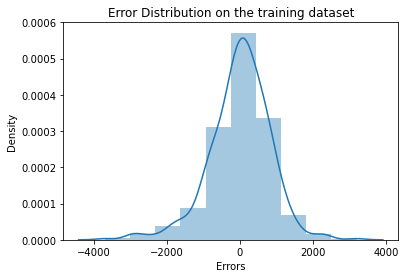

In [58]:
# predicting the model on trianing dataset
y_train_pred = lr.predict(X_train[cols])

# Ploting distribution plot for chrcking the distribution of error terms
sns.distplot(y_train-y_train_pred,bins=10)
plt.title("Error Distribution on the training dataset")
plt.xlabel("Errors");

**<font color='blue'>Inference:**
- Errors terms are normally distributed and centred around mean 0
- So we can make Predictions

### <font color='blue'>6.2 Pattern checking for Actual Vs Predicted

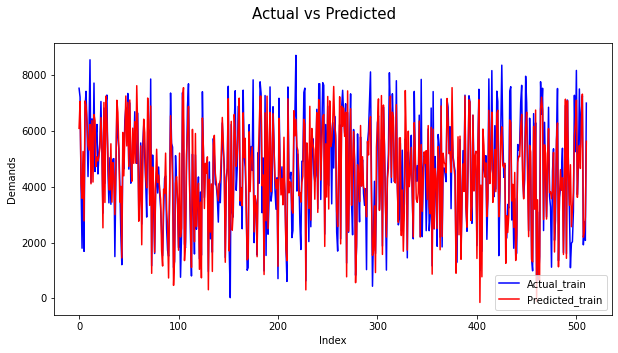

In [59]:
# Actual vs Predicted

c = [i for i in range(0,len(X_train),1)]
plt.figure(figsize=[10,5])
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.legend(["Actual_train","Predicted_train"],loc="lower right")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands');

**<font color='blue'>Inference:**
- Actual and Predicted both are following almost the same pattern in the training dataset, so this model seems to fit well

### <font color='blue'>6.3 Checking the error term pattern

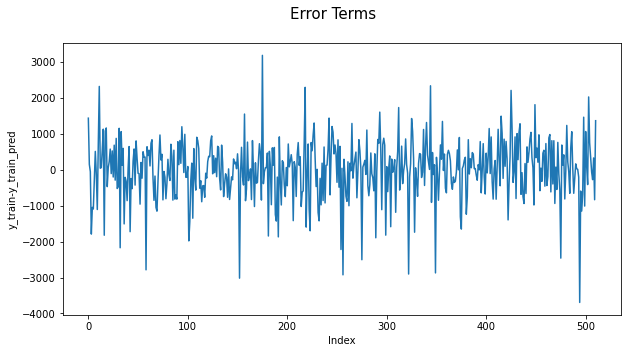

In [60]:
# Checking error term pattern

c = [i for i in range(0,len(X_train),1)]
plt.figure(figsize=[10,5])
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

**<font color='blue'>Inference:**
- The error terms are independent of each other

### <font color='blue'>6.4 Checking the $R^2$ value using sklearn

In [61]:
#Printint R-squared Value using sklearn

r2_score(y_train,y_train_pred)

0.8185052141521469

**<font color='blue'>Inference:**
- $R^2$ value is the same as we obtained for our final model

### <font color='blue'>6.5 Checking the relationship between `y_train` and `residuals`

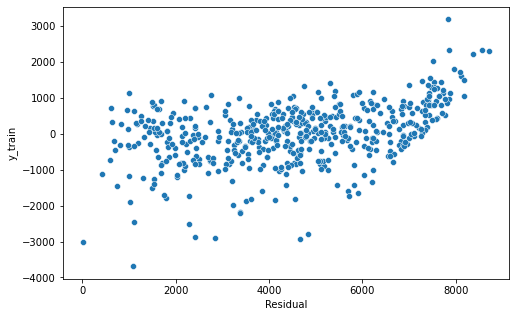

In [62]:
# Checking the relationship by scaatter plot

residual = (y_train - y_train_pred)
plt.figure(figsize=[8,5])
sns.scatterplot(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

**<font color='blue'>Inference:**
- Seems like there is no relationship between `y_train (Target variable)` and `Residuals`

---
## <font color='blue'>7. Predictions and evaluation on the test data

### <font color='blue'>7.1 Predictions on the test dataset

In [63]:
# List of features to be scaled
num_vars = ['temp','atemp','hum','windspeed']

# Test data to be transformed only, no fitting
X_test[num_vars] = scalar.transform(X_test[num_vars])

In [64]:
# Columns from our final model
cols = ['yr','temp','holiday','windspeed', 'season_spring', 'mnth_Jan', 'weathersit_Cloudy',
       'weathersit_Light Rain + Thunderstorm']

# Predicting the values for test data
y_test_pred = lr.predict(X_test[cols])

### <font color='blue'>7.2 $R^2$ value for test predictions

In [65]:
# Finding the R2 value for test dataset usking sklearn

r2_score(y_test,y_test_pred)

0.7916449199914655

In [66]:
# % of difference between train model r2 and test model r2

print("% Difference between r2 score for test and train model is",
      str(round((r2_score(y_train,y_train_pred) - r2_score(y_test,y_test_pred))*100,2))+'%')

% Difference between r2 score for test and train model is 2.69%


**<font color='blue'>Inference:**
- $R^2$ value for predictions on test data (0.79) is almost the same as R2 value of train data(0.819). This is a good R-squared value
- The difference between the $R^2$ values is less than `5%`
- Hence we can see our model is performing well even on unseen data (test data)

### <font color='blue'>7.3 Model Evaluation

#### <font color='blue'>7.3.1 Checking the relationship between Actual Vs Predicted

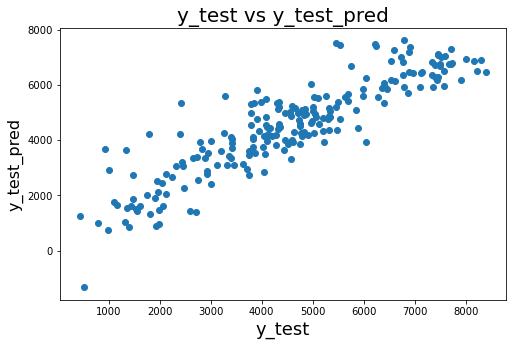

In [67]:
# Plotting y_test and y_test_pred to understand the spread

plt.figure(figsize=[8,5])
plt.scatter(y_test, y_test_pred)
plt.title('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16);

**<font color='blue'>Inference:**
- We can observe that the variance of the residuals (error terms) is constant across predictions. i.e. the error term does not vary much as the value of the predictor variable changes.

#### <font color='blue'>7.3.2 Checking the pattern between actual and predicted

In [68]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    plt.legend(['Actual_test','Predicted_test'],loc = 'lower right')
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                                           # X-label
    plt.ylabel('Counts', fontsize=16)                                          # y-label

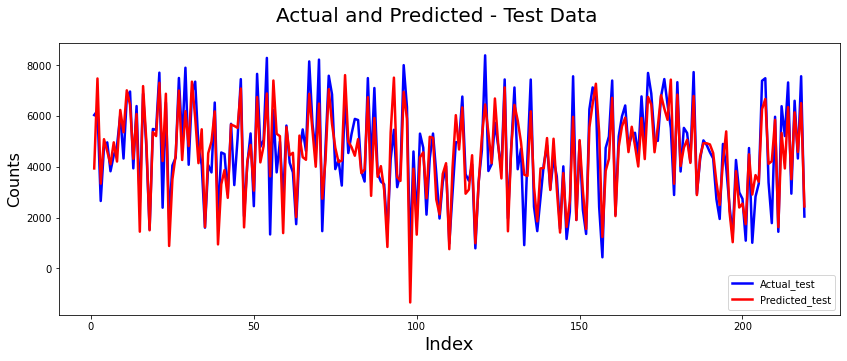

In [69]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

**<font color='blue'>Inference:**
- Actual and Predicted both are following almost the same pattern in the test dataset, so this model seems to fit well

#### <font color='blue'>7.3.3 Checking distribution of Error term 

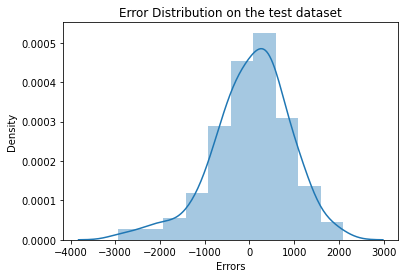

In [70]:
# Ploting distribution plot for chrcking the distribution of error terms
sns.distplot(y_test-y_test_pred,bins=10)
plt.title("Error Distribution on the test dataset")
plt.xlabel("Errors");

**<font color='blue'>Inference:**
- Errors are normally distributed, centred around mean 0

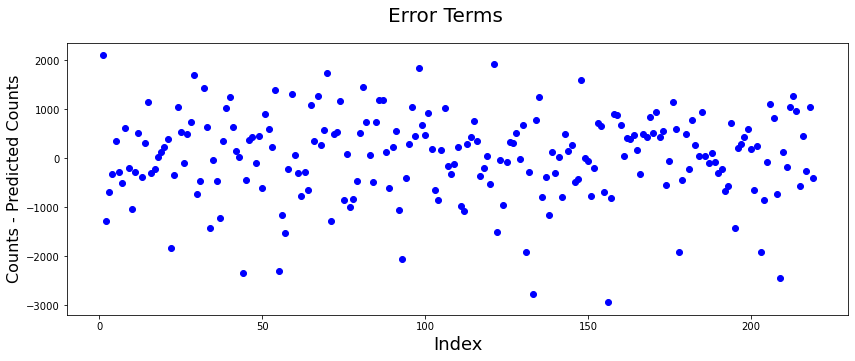

In [71]:
# Error terms

c = [i for i in range(1,220,1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_test-y_test_pred, color="blue", marker='o', linewidth=2.5, linestyle="")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Counts - Predicted Counts', fontsize=16);  # Y-label

**<font color='blue'>Inference:**
- As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

---
## <font color='blue'>8. Final Model Interpretation

In [72]:
# Getting the summary of final model

cols = ['yr','temp','holiday','windspeed', 'season_spring', 'mnth_Jan', 'weathersit_Cloudy',
       'weathersit_Light Rain + Thunderstorm']

model_bulding(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     283.0
Date:                Wed, 17 Nov 2021   Prob (F-statistic):          1.40e-180
Time:                        13:33:51   Log-Likelihood:                -4160.6
No. Observations:                 511   AIC:                             8339.
Df Residuals:                     502   BIC:                             8377.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


**<font color='blue'>We can see that the equation for best fitted line is:**

$$cnt(demand) = 2935.8149 + 2064.0890\times{yr} + 3002.2414\times{temp} - 721.3617\times{holiday} - 1444.0483\times{windspeed}  \\ - 1192.1864\times{season\text{_}spring} - 488.3723\times{mnth\text{_}Jan} - 649.0566\times{weathersit\text{_}Cloudy} - 2404.2143\times{(weathersit\text{_}Light Rain + Thunderstorm)}$$

##### <font color='blue'>Model Interpretation:

- **`yr`** -  The demand for bike-sharing is increasing by year on year
    
    
- **`temp`** - The rise in `temperature` the demand for the bike also increases
    
    
- **`holiday`** - The bike demand may fall on `holidays`
    
    
- **`windspeed`** - The bike demand may fall if the `wind speed` is high
    
    
- **`Season_spring`** - The bike demand may fall during the `spring season`
    
    
- **`Mnth_Jan`** - The bike demand may fall during the `January` month of the year
    

- **`weathersit_Cloudy & weathersit_Light Rain + Thunderstorm`** - The bike demand may fall during the `Rainy` season

---
## <font color='blue'>9. Recommendations for the company

- The company should focus on expanding their business during summer & clear weather season


- Based on previous data it is expected to have a boom in the number of users once the situation comes back to normal, compared to 2019.


- There would be fewer bookings during Light Snow or Rain, they could probably use this time to service the bikes without having a business impact.


- Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.


**<font color='blue'>Conclusion**:

Significant variables to predict the demand for shared bikes

- Year (2019)
- temp
- holiday
- windspeed
- Season
- Months
- weathersit (Cloudy,Light rain & Thunderstorm)

---